# Convolutional neural network

In the previous chapter, we saw how to create a simple network. These were simple images with little information, in black and white. The patterns were repeated quite often and the shapes were quite simple. But this kind of architecture would not work with more complex images, such as that of a cat for example. The computation time would be so long that it would become unusable. 

To solve this type of problem, it is preferable to use a so-called convolution architecture. This is what we will see in this chapter. 



## What is a convolutional ?

A convolution is an operation that changes a function into something else. We do convolutions so that we can transform the original function into a form to get more information.

Convolutions have been used for a long time in image processing to blur and sharpen images, and perform other operations, such as, enhance edges and emboss.

![Conv](./img/conv.jpg)

Here, the original image is the one on the left and the matrix of numbers in the middle is the convolutional matrix or filter.

A convolution operation is an element wise matrix multiplication operation. Where one of the matrices is the image, and the other is the filter or kernel that turns the image into something else. The output of this is the final convoluted image.

![schema](./img/schema.gif)

f the image is larger than the size of the filter, we slide the filter to the various parts of the image and perform the convolution operation. Each time we do that, we generate a new pixel in the output image.

The number of pixels by which we slide the kernel is known as the stride. The stride is usually kept as 1, but we can increase it. When increased, we might have to increase the size of the image by a few pixels to fit in the kernel at the edges of the image. This increase is called padding.

I’ll talk more about how this can help us get more information from an image in a later section.

### CONVOLUTIONAL FILTERS IN MACHINE LEARNING

Convolutions aren’t a new concept. They have been used in image and signal processing for a long time. However, convolutions in machine learning are different than those in image processing.

In image processing, there are a set few filters that are used to perform a few tasks. For example, a filter that can be used to blur images may look like this:

![filter 2](./img/filter2.png)



Whereas, a filter that does the opposite, sharpen an image, looks like this:

![filter2](./img/04.jpg)

Other filters, like sobel filters, can perform an edge detection and other operations.
![filter 4](./img/05.jpg)

In CNNs, filters are not defined. The value of each filter is learned during the training process.

By being able to learn the values of different filters, CNNs can find more meaning from images that humans and human designed filters might not be able to find.

More often than not, we see the filters in a convolutional layer learn to detect abstract concepts, like the boundary of a face or the shoulders of a person. By stacking layers of convolutions on top of each other, we can get more abstract and in-depth information from a CNN.

A second layer of convolution might be able to detect the shapes of eyes or the edges of a shoulder and so on. This also allows CNNs to perform hierarchical feature learning; which is how our brains are thought to identify objects.

![image 5](./img/06.jpg)

In the image, we can see how the different filters in each CNN layer interprets the number 0.

It is this ability of CNNs to be able to detect abstract and complex features that makes them so attractive in image recognition problems.

Depending on the kind of problem we are solving and the types of features we are trying to learn, we use different kinds of convolutions.

#### The 2D convolution layer 
The most common type of convolution that is used is the 2D convolution layer, and is usually abbreviated as conv2D. A filter or a kernel in a conv2D layer has a height and a width. They are generally smaller than the input image and so we move them across the whole image. The area where the filter is on the image is called the receptive field.

Working: Conv2D filters extend through the three channels in an image (Red, Green, and Blue). The filters may be different for each channel too. After the convolutions are performed individually for each channels, they are added up to get the final convoluted image. The output of a filter after a convolution operation is called a feature map.

![image 7](./img/07.jpg)

Each filter in this layer is randomly initialized to some distribution (Normal, Gaussian, etc.). By having different initialization criteria, each filter gets trained slightly differently. They eventually learn to detect different features in the image.

If they were all initialized similarly, then the chances of two filters learning similar features increase dramatically. Random initialization ensures that each filter learns to identify different features.

Since each conv2D filter learns a separate feature, we use many of them in a single layer to identify different features. The best part is that every filter is learnt automatically.

Each of these filters are used as inputs to the next layer in the neural network.

If there are 8 filters in the first layer and 32 in the second, then each filter in the second layer sees 8 filter inputs. Meaning that we get 32X8 feature maps in the second layer. Each of the 8 feature maps of a single filter are added to get a single output from each layer.

**What the conv2D layer is doing:**  

Each filter in the conv2D layer is a matrix of numbers. The matrix corresponds to a pattern or feature that the filter is looking for.

In the image below, the filter is looking for a curved line. That curved line could correspond to the back of a mouse, or a part of the numbers 8, 9, 0, etc. Whenever the filter comes across a pattern like that in the image, it gives a high output.


![image 8](./img/08.jpg)

Although this may seem like a very simple example, most conv2D filters in the first layer of a CNN search for similar features. It also means that the same filter can be used to extract information from multiple types of images (mouse, numbers, faces and so on).

**Where the conv2D layer is used:**  

These are used in the first few convolutional layers of a CNN to extract simple features. They have also been used in capsule networks. Previously, they were the sole filters used and they made up most of a CNN. For example, the original LeNet architecture and the AlexNet architecture mostly used conv2D filters.

Nowadays, with advancements in convolutional layers and filters, more sophisticated filters have been designed that can serve different purposes and can be used for different applications. We’ll look at some of them later on.

**How to use them while designing a CNN:**  


Conv2D filters are used only in the initial layers of a Convolutional Neural Network. They are put there to extract the initial high level features from an image.

While there are many rules of thumb for designing such filters, they are generally stacked with an increasing number of filters in each layer. Each successive layer can have two to four times the number of filters in the previous layer. This helps the network learn hierarchical features.

**Limitations of the conv2D layer:**   

The conv2D layer works fairly impressively. However, they do have certain limitations, which prompted researchers to find alternatives to the conv2D layer.

Their biggest limitation is the fact that they are very computationally expensive. A large conv2D filter will take a lot of time to compute and stacking many of them in layers will increase the amount of computations.

An easy solution to this is to decrease the size of the filters and increase the strides. While you can do that, it also reduces the effective receptive field of the filter and reduces the amount of information that it can capture. In fact, in the first Convolutional Network paper, Yann Le Cunn, had mentioned his fear of having a 1x1 convolutional filter.

However, before we look at the other types of convolutions, it is best to get a more intuitive understanding of filters.

Conv2D layers are generally used for achieving high accuracy in image recognition tasks. However, they require a lot of calculations to be done and are very RAM intensive.

Dilated or Atrous Convolutions reduces the complexity of the convolution operation. This means that they can be used in real time applications and in applications where the processing power is less like in smartphones.

**Polling layer**

Note: Pooling is not a convolutional layer, but we are talking about it here, as it is a layer that is used commonly in CNNs.

The pooling layer was introduced for two main reasons: The first was to perform downsampling, that is, to reduce the amount of computation that needs to be done, and the second to send only the important data to the next layers in the CNNs.

How they work: There are two kinds of pooling layers: max pooling and average pooling.

In max pooling, we take only the value of the largest pixel among all the pixels in the receptive field of the filter. In the case of average pooling, we take the average of all the values in the receptive field.

![image11](./img/11.jpg)

There are many arguments about which one is better and there are many rules of thumb about when to use which, but, typically max pooling is more commonly used.

Since we try to downsample the input vector, pooling kernels do not overlap, i.e., they have a stride that is larger than the size of the kernel itself.

**Limitations of the Pooling layer:** 

Downsampling by pooling causes lots of problems in CNNs.

The pooling layer loses positional information about the different objects inside the image. This is why, many new architectures have stopped using the pooling layer altogether.

The pooling layer was introduced to reduce computational time and complexity by reducing the number of parameters. With the rise in computational power and the presence of better ways of downsampling, like Separable and Dilated Convolutions, the pooling layer can be cast aside.


## Let us look at this in a more concrete way. 

We are going to study the parameters Keras Conv2D class, and we will see the most important parameters you need to tune when training your own Convolutional Neural Networks (CNNs). From there we are going to use the Keras Conv2D class to implement a simple CNN. We’ll then train and evaluate this CNN on the CIFAR-10 dataset.

**Goals**

1. Quickly determine if you need to utilize a specific parameter to the Keras Conv2D class
2. Decide on a proper value for that specific parameter
3. Effectively train your own Convolutional Neural Network
 



Let’s go ahead and get started!

## The Keras Conv2D class
The Keras Conv2D class constructor has the following signature:

````python
model.add(Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None))
````

Looks a bit overwhelming, right?

How in the world are you supposed to properly set these values?

No worries — let’s examine each of these parameters individually, giving you a strong understanding of not only what each parameter controls but also how to properly set each parameter as well.

### Filters

![image filter](./img/filters.png)
> **Figure 1:** The Keras Conv2D parameter, filters determines the number of kernels to convolve with the input volume. Each of these operations produces a 2D activation map.

The first required Conv2D parameter is the number of filters  that the convolutional layer will learn.

Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.

Conv2D layers in between will learn more filters than the early Conv2D layers but fewer filters than the layers closer to the output. Let’s go ahead and take a look at an example:

````python 
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Activation("softmax"))
````

On Line 1 we learn a total of 32  filters. Max pooling is then used to reduce the spatial dimensions of the output volume.

We then learn 64  filters on Line 4. Again max pooling is used to reduce the spatial dimensions.

The final Conv2D layer learns 128  filters.

Notice at as our output spatial volume is decreasing our number of filters learned is increasing — this is a common practice in designing CNN architectures and one I recommend you do as well. As far as choosing the appropriate number of filters , I nearly always recommend using powers of 2 as the values.

You may need to tune the exact value depending on (1) the complexity of your dataset and (2) the depth of your neural network, but I recommend starting with filters in the range [32, 64, 128] in the earlier and increasing up to [256, 512, 1024] in the deeper layers.

Again, the exact range of the values may be different for you, but start with a smaller number of filters and only increase when necessary.

### Kernel size
![image 12](./img/12.png)
> **Figure 2:** The Keras deep learning Conv2D parameter, filter_size, determines the dimensions of the kernel. Common dimensions include 1×1, 3×3, 5×5, and 7×7 which can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.

The second required parameter you need to provide to the Keras Conv2D class is the kernel_size , a 2-tuple specifying the width and height of the 2D convolution window.

The kernel_size  must be an odd integer as well.

Typical values for kernel_size  include: (1, 1) , (3, 3) , (5, 5) , (7, 7) . It’s rare to see kernel sizes larger than 7×7.

So, when do you use each?

If your input images are greater than 128×128 you may choose to use a kernel size > 3 to help (1) learn larger spatial filters and (2) to help reduce volume size.

Other networks, such as VGGNet, exclusively use (3, 3)  filters throughout the entire network.

More advanced architectures such as Inception, ResNet, and SqueezeNet design entire micro-architectures which are “modules” inside the network that learn local features at different scales (i.e., 1×1, 3×3, and 5×5) and then combine the outputs.

A great example can be seen in the Inception module below:

![image13](./img/13.png)
> **Figure 3:** The Inception/GoogLeNet CNN architecture uses “micro-architecture” modules inside the network that learn local features at different scales (filter_size) and then combine the outputs.


The Residual module in the ResNet architecture uses 1×1 and 3×3 filters as a form of dimensionality reduction which helps to keep the number of parameters in the network low (or as low as possible given the depth of the network):

![image13](./img/14.png)
> **Figure 4:** The ResNet “Residual module” uses 1×1 and 3×3 filters for dimensionality reduction. This helps keep the overall network smaller with fewer parameters.

**So, how should you choose your filter_size ?**

First, examine your input image — is it larger than 128×128?

If so, consider using a 5×5 or 7×7 kernel to learn larger features and then quickly reduce spatial dimensions — then start working with 3×3 kernels:

````python
model.add(Conv2D(32, (7, 7), activation="relu"))
...
model.add(Conv2D(32, (3, 3), activation="relu"))

````

If your images are smaller than 128×128 you may want to consider sticking with strictly 1×1 and 3×3 filters.


### Strides

The strides  parameter is a 2-tuple of integers, specifying the “step” of the convolution along the x and y axis of the input volume.

The strides  value defaults to (1, 1) , implying that:

A given convolutional filter is applied to the current location of the input volume
The filter takes a 1-pixel step to the right and again the filter is applied to the input volume
This process is performed until we reach the far-right border of the volume in which we move our filter one pixel down and then start again from the far left
Typically you’ll leave the strides  parameter with the default (1, 1)  value; however, you may occasionally increase it to (2, 2)  to help reduce the size of the output volume (since the step size of the filter is larger).

Typically you’ll see strides of 2×2 as a replacement to max pooling:

```python
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu"))
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu"))
model.add(Conv2D(128, (3, 3), strides=(2, 2), activation="relu"))
```

Here we can see our first two Conv2D layers have a stride of 1×1. The final Conv2D layer; however, takes the place of a max pooling layer, and instead reduces the spatial dimensions of the output volume via strided convolution.

In 2014, Springenber et al. published a paper entitled Striving for Simplicity: [The All Convolutional](https://arxiv.org/abs/1412.6806) Net which demonstrated that replacing pooling layers with strided convolutions can increase accuracy in some situations.

ResNet, a popular CNN, has embraced this finding — if you ever look at the source code to a ResNet implementation (or implement it yourself), you’ll see that ResNet replies on strided convolution rather than max pooling to reduce spatial dimensions in between residual modules.

### Padding

![image15](./img/15.gif)
> **Figure 5:** A 3×3 kernel applied to an image with padding. The Keras Conv2D padding parameter accepts either "valid" (no padding) or "same" (padding + preserving spatial dimensions). This animation was contributed to StackOverflow [(source)](https://stackoverflow.com/questions/52067833/how-to-plot-an-animated-matrix-in-matplotlib).

The padding  parameter to the Keras Conv2D class can take on one of two values: valid  or same .

With the valid  parameter the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

The following example would naturally reduce the spatial dimensions of our volume:

```Python
model.add(Conv2D(32, (3, 3), padding="valid"))
```

If you instead want to preserve the spatial dimensions of the volume such that the output volume size matches the input volume size, then you would want to supply a value of same  for the padding :

```Python
model.add(Conv2D(32, (3, 3), padding="same"))
```

While the default Keras Conv2D value is valid  I will typically set it to same  for the majority of the layers in my network and then either reduce spatial dimensions of my volume by either:  

1. Max pooling
2. Strided convolution

I would recommend that you use a similar approach to padding with the Keras Conv2D class as well.

### data_format

![image 16](./img/16.png)
> **Figure 6:** Keras, as a high-level framework, supports multiple deep learning backends. Thus, it includes support for both “channels last” and “channels first” channel ordering.



The data format value in the Conv2D class can be either channels_last  or channels_first :

- The TensorFlow backend to Keras uses channels last ordering.
- The Theano backend uses channels first ordering.

You typically shouldn’t have to ever touch this value as Keras for two reasons:

1. You are more than likely using the TensorFlow backend to Keras
2. And if not, you’ve likely already updated your ~/.keras/keras.json  configuration file to set your backend and associated channel ordering

My advice is to never explicitly set the data_format  in your Conv2D class unless you have a very good reason to do so.

### dilation_rate 

![image 17](./img/17.png)
> **Figure 7:** The Keras deep learning Conv2D parameter, dilation_rate, accepts a 2-tuple of integers to control dilated convolution [(source)](http://www.erogol.com/dilated-convolution/).

The dilation_rate  parameter of the Conv2D class is a 2-tuple of integers, controlling the dilation rate for dilated convolution. Dilated convolution is a basic convolution only applied to the input volume with defined gaps, as Figure 7 above demonstrates.

You may use dilated convolution when:

You are working with higher resolution images but fine-grained details are still important
You are constructing a network with fewer parameters
Discussing dilated convolution is outside the scope of this tutorial so if you are interested in learning more, please [refer to this tutorial](http://www.erogol.com/dilated-convolution/).

### activation 
![activation](./img/18.png)
> **Figure 8:** Keras provides a number of common activation functions. The activation parameter to Conv2D is a matter of convenience and allows the activation function for use after convolution to be specified.



The activation  parameter to the Conv2D class is simply a convenience parameter, allowing you to supply a string specifying the name of the activation function you want to apply after performing the convolution.

In the following example we perform convolution and then apply a ReLU activation function:  

````python
model.add(Conv2D(32, (3, 3), activation="relu"))

````

The above code is equivalent to:

````python
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
````
Use the activation  parameter if you and if it helps keep your code cleaner — it’s entirely up to you and won’t have an impact on the performance of your Convolutional Neural Network.


### use_bias
The use_bias  parameter of the Conv2D class controls whether a bias vector is added to the convolutional layer.

Typically you’ll want to leave this value as True , although some implementations of ResNet will leave the bias parameter out.

I recommend keep the bias unless you have a good reason not to.

### kernel_initializer and bias_initializer
![19](./img/19.png)

> **Figure 9:** Keras offers a number of initializers for the Conv2D class. Initializers can be used to help train deeper neural networks more effectively.

The kernel_initializer  controls the initialization method used to initialize all values in the Conv2D class prior to actually training the network.

Similarly, the bias_initializer  controls how the bias vector is initialized before training starts.

A full list of initializers can be found in the Keras documentation; however, here is what I recommend:

1. Leave the bias_initialization  alone — it will by default filled with zeros (you’ll rarely if ever, have to change the bias initialization method.  


2. The kernel_initializer  defaults to glorot_uniform , the Xavier Glorot uniform initialization method, which is perfectly fine for the majority of tasks; however, for deeper neural networks you may want to use  he_normal  (MSRA/He et al. initialization) which works especially well when your network has a large number of parameters (i.e., VGGNet).


### kernel_regularizer, bias_regularizer, and activity_regularizer
![20](./img/20.png)

> **Figure 10:** Regularization hyperparameters should be adjusted especially when working with large datasets and really deep networks. The kernel_regularizer parameter in particular is one that I adjust often to reduce overfitting and increase the ability for a model to generalize to unfamiliar images.

The kernel_regularizer , bias_regularizer , and activity_regularizer  control the type and amount of regularization method applied to the Conv2D layer.

Applying regularization helps you to:

1. Reduce the effects of overfitting
2. Increase the ability of your model to generalize

**When working with large datasets and deep neural networks applying regularization is typically a must.**

Normally you’ll encounter either L1 or L2 regularization being applied — I will use L2 regularization on my networks if I detect signs of overfitting:

```python
from keras.regularizers import l2
...
model.add(Conv2D(32, (3, 3), activation="relu"),
	kernel_regularizer=l2(0.0005))
```


The amount of regularization you apply is a hyperparameter you will need to tune for your own dataset, but I find values of 0.0001-0.001 are good ranges to start with.

I would suggest leaving your bias regularizer alone — regularizing the bias typically has very little impact on reducing overfitting.

I also suggest leaving the activity_regularizer  at its default value (i.e., no activity regularization).

While weight regularization methods operate on weights themselves, f(W), where f is the activation function and W are the weights, an activity regularizer instead operates on the outputs, f(O), where O is the outputs of a layer.

Unless there is a very specific reason you’re looking to regularize the output it’s best to leave this parameter alone.


### kernel_constraint and bias_constraint

The final two parameters to the Keras Conv2D class are the kernel_constraint  and bias_constraint .

These parameters allow you to impose constraints on the Conv2D layer, including non-negativity, unit normalization, and min-max normalization.

You can see the full list of supported constraints in the Keras documentation.

Again, I would recommend leaving both the kernel constraint and bias constraint alone unless you have a specific reason to impose constraints on the Conv2D layer.

## CIFAR-10 Photo Classification Dataset
CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.


### Import plug-in

In [3]:
# example of loading the cifar10 dataset
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers 
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # this line is for hiding the futerwarning of tensorflow

### As a good practice suggests, we need to declare our variables:

- *batch_size* – the number of training examples in one forward/ backwards pass. The higher the batch size, the more memory space you’ll need
- *num_classes* – number of cifar-10 dataset classes
- *one epoch* – one forward pass and one backward pass of all the training examples
- *class_names* – an array includes all 10 class names

In [4]:
# Declare variables
batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 # number of outputs possible
epochs =  50 # repeat 
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"]

### Load the dataset

In [5]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Print figure with 10 random images from the CIFAR-10 dataset.

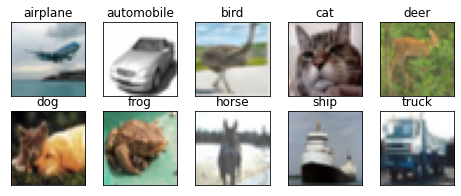

In [17]:
# Print figure with 10 random images from each
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(0,1,2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Normalized data
It’s good practice to work with normalized data.

Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to float point values in order to perform the division.

**Exercise :** 
1. Cast x_train & x_test in ``float32``.
2. Normalize the data so that they have a value in 0 and 1

In [6]:
### Enter your code here (4 lines)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

In [7]:
x_train = x_train / 255
x_test = x_test / 255
### End

**Exercise :** Transform y data into categorical data

In [8]:
### Enter your code here (2 lines)

# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


### Let’s start by defining a simple CNN model. *(4 layers)*

We will use a model with four convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions:

1. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
2. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
3. Max Pool layer with size 2×2
4. Dropout set to 25%
5. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
6. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
7. Max Pool layer with size 2×2
8. Dropout set to 25%
9. Flatten layer
10. Fully connected layer with 512 units and a rectifier activation function
11. Dropout set to 50%
12. Fully connected output layer with 10 units and a softmax activation function

A logarithmic loss function is used with the stochastic gradient descent (SGD) optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.1.

Then we can fit this model with 50 epochs and a batch size of 32.
 

In [19]:
def model_4_layers():
 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu')) # Layer 1
    model.add(Conv2D(32,(3, 3), activation='relu' )) # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # Layer 3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512,activation='relu' ))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_4 = model_4_layers()

We can see a summary of the model

In [37]:
cnn_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

### Fit the model
![https://www.theux.be/fr/ma-commune/services-communaux/attention.jpg/@@images/image.jpeg](https://www.theux.be/fr/ma-commune/services-communaux/attention.jpg/@@images/image.jpeg)
Be careful, training the model with convolution networks is resource-intensive.  
If you have a good graphics card it is then better to configure your python environment to use your gpu. 

In my case, a "gpu" environment was already preconfigured with Anaconda. If this is not your case, you will have to do a small google search.

The time saving is not negligible, by doing tests, I could see that the training was done 5 times faster using the gpu. (21 seconds per epoch instead of 110 seconds)

#### Let's go !

In [38]:
cnn4 = cnn_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 243s 155ms/step - loss: 1.4635 - accuracy: 0.4680 - val_loss: 1.1007 - val_accuracy: 0.6059
Epoch 2/50
1563/1563 [==============================] - 240s 153ms/step - loss: 1.0610 - accuracy: 0.6236 - val_loss: 0.8816 - val_accuracy: 0.6905
Epoch 3/50
1563/1563 [==============================] - 240s 154ms/step - loss: 0.9106 - accuracy: 0.6802 - val_loss: 0.8043 - val_accuracy: 0.7195
Epoch 4/50
1563/1563 [==============================] - 294s 188ms/step - loss: 0.8195 - accuracy: 0.7097 - val_loss: 0.7513 - val_accuracy: 0.7401
Epoch 5/50
1563/1563 [==============================] - 253s 162ms/step - loss: 0.7574 - accuracy: 0.7355 - val_loss: 0.8238 - val_accuracy: 0.7171
Epoch 6/50
1563/1563 [==============================] - 206s 132ms/step - loss: 0.7040 - accuracy: 0.7525 - val_loss: 0.7006 - val_accuracy: 0.7626
Epoch 7/50
1563/1563 [==============================] - 201s 129ms/step - loss: 0.6673 - accuracy: 0.7663 - val_

In [40]:
scores4l = cnn_4.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4l[1]*100))

Accuracy: 79.10%


**My scrore**  
Accuracy: 79.73%  
Epochs : 50  
Btach_size : 32  
Time : 17 min  
GPU : GTX 1050  

### Save your model

In [41]:
cnn_4.save("cnn4.h5")

### Display histogram

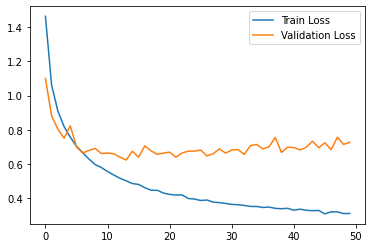

In [42]:
plt.plot(cnn4.history['loss'], label='Train Loss')
plt.plot(cnn4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

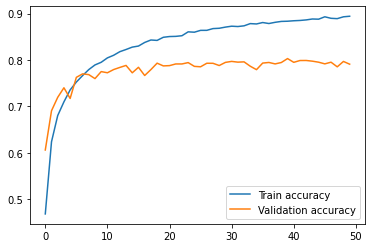

In [44]:
plt.plot(cnn4.history['accuracy'], label='Train accuracy')
plt.plot(cnn4.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

We can see that there is overfiting from the 15th epochs.   
So there is no need to continue beyond that with this model and this dataset and the risk of over-interpretation.

### The second variant for 6 Layer model

1. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
2. Dropout set to 20%
3. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
4. Max Pool layer with size 2×2
5. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
6. Dropout set to 20%
7. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
8. Max Pool layer with size 2×2
9. Convolutional input layer, 128 feature maps with a size of 3×3, a rectifier activation function
10. Dropout set to 20%
11. Convolutional input layer, 128 feature maps with a size of 3×3, a rectifier activation function
12. Max Pool layer with size 2×2
13. Flatten layer
14. Dropout set to 20%
15. Fully connected layer with 1024 units and a rectifier activation function and a weight constraint of max norm set to 3
16. Dropout set to 20%
17. Fully connected output layer with 10 units and a softmax activation function

**Exercise :** Create the 6-layer model following the instructions above.

In [10]:
from tensorflow.keras.constraints import max_norm

def model_6_layers():
    
    model = Sequential()
    ### Enter your code here (+- 17 lines)
    #### layer 1 : (2 lines)
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Dropout(0.20))
    
    #### layer 2 : (2 lines)
    model.add(Conv2D(32,(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #### layer 3 : (2 lines)
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.20))
    
    #### layer 4 : (2 lines)
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #### layer 5 : (2 lines)
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.20))

    #### layer 6 : (2 lines)
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    ### End of your code 
    
    # Compile model 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_6 = model_6_layers()

**Exercice :** Display the summary of the model

In [11]:
### Enter ypur code here (1 line)
cnn_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

**You should do something like this:**

````
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
dropout_32 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_34 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10250     
=================================================================
Total params: 2,395,434
Trainable params: 2,395,434
Non-trainable params: 0
_________________________________________________________________

````

**Exercise :** Fit the model with 15 epochs

In [12]:
### Enter your code here (1 line) 
cnn6 = cnn_6.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test,y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 284s 182ms/step - loss: 1.6957 - accuracy: 0.3690 - val_loss: 1.3446 - val_accuracy: 0.5087
Epoch 2/10
1563/1563 [==============================] - 282s 181ms/step - loss: 1.2648 - accuracy: 0.5429 - val_loss: 1.1205 - val_accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 264s 169ms/step - loss: 1.0631 - accuracy: 0.6221 - val_loss: 0.9334 - val_accuracy: 0.6709
Epoch 4/10
1563/1563 [==============================] - 269s 172ms/step - loss: 0.9525 - accuracy: 0.6638 - val_loss: 0.9019 - val_accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 257s 164ms/step - loss: 0.8758 - accuracy: 0.6922 - val_loss: 0.8463 - val_accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 257s 164ms/step - loss: 0.8239 - accuracy: 0.7116 - val_loss: 0.8130 - val_accuracy: 0.7209
Epoch 7/10
1563/1563 [==============================] - 279s 178ms/step - loss: 0.7829 - accuracy: 0.7259 - val_

### Save your model 

**Exercise :** Save your model 

In [13]:
### Enter your code here (1 line) 
cnn_6.save("cnn6.h5")

### Display histogram 

**Exercise :** Display histogram with loss and accuracy data in ``cnn6``.

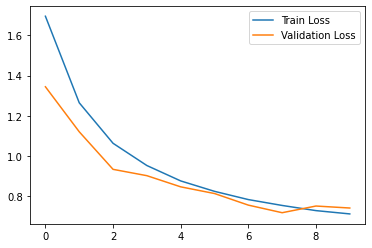

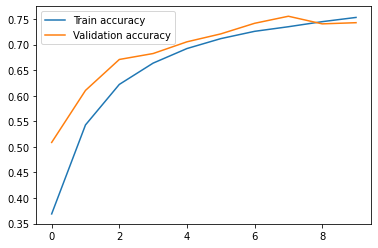

In [16]:
### Display LOSS 
### Enter your code here (+- 4 lines)
plt.plot(cnn6.history['loss'], label='Train Loss')
plt.plot(cnn6.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Display ACCURACY
### Enter your code here (+- 4 lines)
plt.plot(cnn6.history['accuracy'], label='Train accuracy')
plt.plot(cnn6.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

### END

In [15]:
scores6l = cnn_6.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores6l[1]*100))

Accuracy: 74.28%


**My score :**  
Accuracy: 77.89%  
Epochs : 15  
Btach_size : 32  
Time : 8 min  
GPU : GTX 1050   

### Augment the dataset 
Last but not least, we have to augment the pictures with the help of a Keras native library ImageDataGenerator. Essentially, you manipulate the pictures in order to cover more ground. It rotates, flipping and shifting the pictures and generates “distorted” images from the initial dataset. You can find more information about this technique here. Finally, we have to compile the model and train the algorithm.

In [17]:
def fit_data_augmentation(model, data_augmentation = True, epochs = epochs, batch_s = batch_size):

    if not data_augmentation:
        print('Not using data augmentation.')
        model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)
    else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.5,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

        # Compute quantities required for feature-wise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)

        # Fit the model on the batches generated by datagen.flow().
        model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_s),
                            steps_per_epoch=len(x_train) / batch_s,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            workers=4)
        return model

In [20]:
fit_data_augmentation(cnn_4)

Using real-time data augmentation.
Epoch 1/50
  44/1562 [..............................] - ETA: 7:31 - loss: 2.2951 - accuracy: 0.1122

KeyboardInterrupt: 

### Limits overfiting with Early Stopping

Keras supports the early stopping of training via a callback called EarlyStopping.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The EarlyStopping callback is configured when instantiated via arguments.

The “monitor” allows you to specify the performance measure to monitor in order to end training. Recall from the previous section that the calculation of measures on the validation dataset will have the ‘val_‘ prefix, such as ‘val_loss‘ for the loss on the validation dataset.

````python 
es = EarlyStopping(monitor='val_loss')
````

Based on the choice of performance measure, the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).

For example, we would seek a minimum for validation loss and a minimum for validation mean squared error, whereas we would seek a maximum for validation accuracy. 

````python 
es = EarlyStopping(monitor='val_loss', mode='min')
````
By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.

That is all that is needed for the simplest form of early stopping. Training will stop when the chosen performance measure stops improving. To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.

````python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
````
Often, the first sign of no further improvement may not be the best time to stop training. This is because the model may coast into a plateau of no improvement or even get slightly worse before getting much better.

We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

````python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
````
The exact amount of patience will vary between models and problems. Reviewing plots of your performance measure can be very useful to get an idea of how noisy the optimization process for your model on your data may be.

By default, any change in the performance measure, no matter how fractional, will be considered an improvement. You may want to consider an improvement that is a specific increment, such as 1 unit for mean squared error or 1% for accuracy. This can be specified via the “min_delta” argument.

````python
es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)
````

We can then update the call to the fit() function and specify a list of callbacks via the **“callback”** argument.
````python
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
````

In [ ]:
# Run this cell
from keras.callbacks import EarlyStopping

cnn_4 = model_4_layers()
cnn_4.summary()
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=5)
history = cnn_4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=1, callbacks=[es])

There you go!  
As soon as keras notices that the val_loss no longer decreases 5 times in a row, he will stop the training

### Save your best model ! 

There is one last thing we need to do. Save the best model. Indeed, the last trained model is not necessarily the best.  To do this we will use the ``ModelCheckpoint()`` method which will allow us to save only the best trained model. 


In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = cnn_4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=1, callbacks=[es, mc])